# BITCOIN PRICE PREDICTION

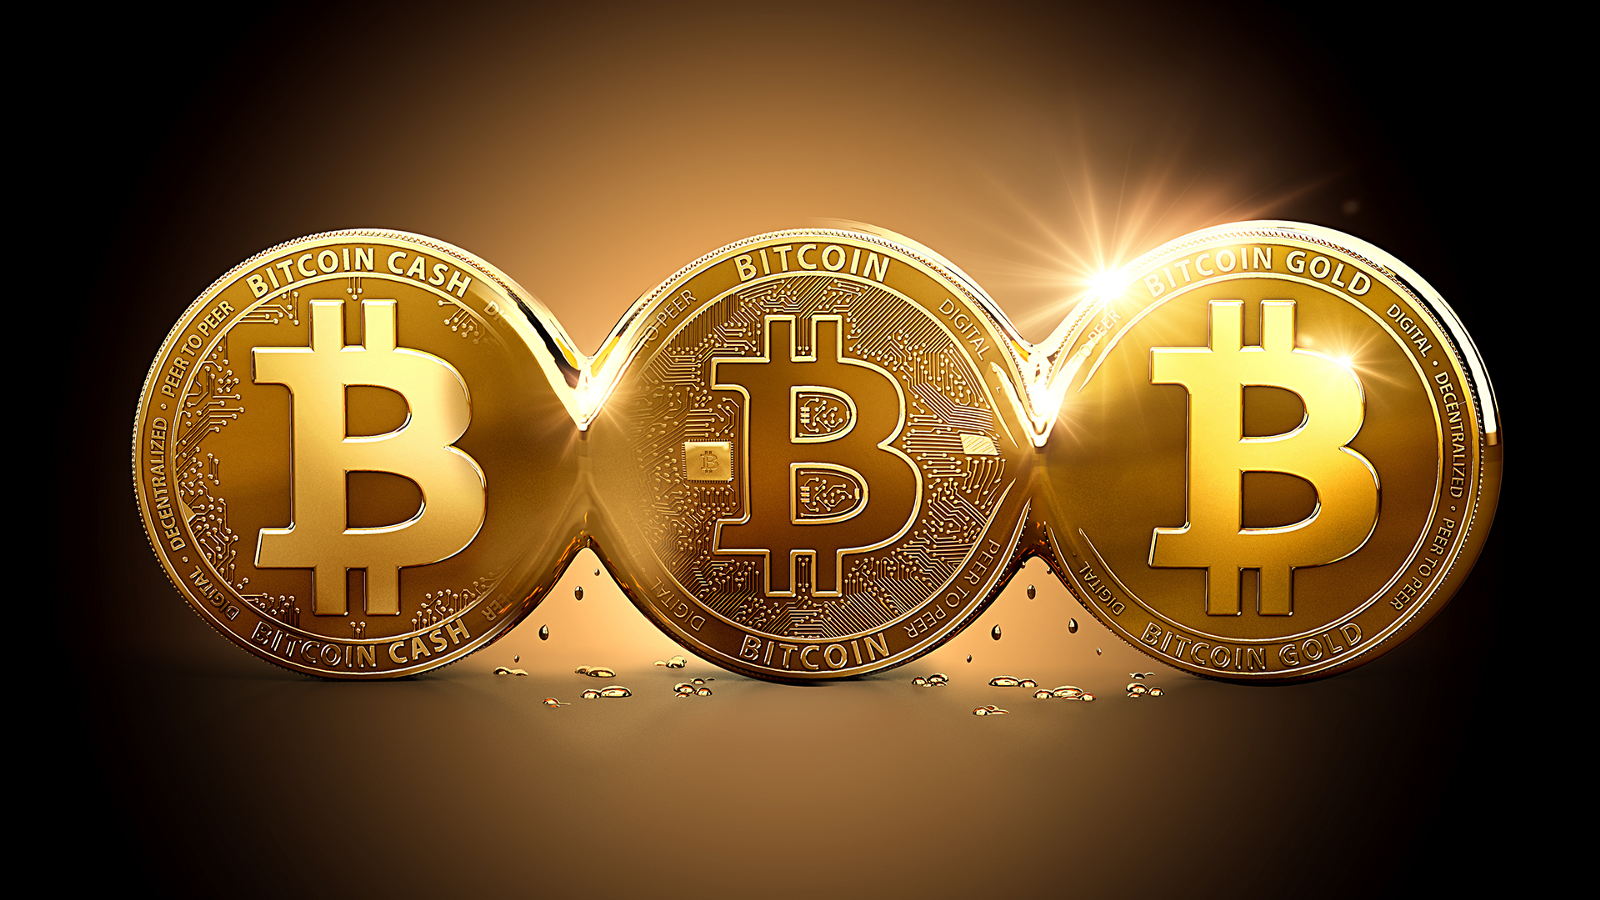

In [1]:
from IPython.display import Image
Image(filename="bitcoin.png")

## Checking and changing the directory

In [2]:
pwd

'/home/student'

In [3]:
cd /home/student/datasets

/home/student/datasets


## Importing necessary libraries

In [4]:
import numpy as np
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#importing libraries for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
#for modelling
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

## Reading the data

In [5]:
a1=pd.read_csv("coinbase.csv")
a2=pd.read_csv("bitstamp.csv")

#### Let's know the data

In [6]:
a1.head(5)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
a1.tail(5)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2099755,1546898520,4006.01,4006.57,4006.00,4006.01,3.382954,13553.433078,4006.390309
2099756,1546898580,4006.01,4006.57,4006.00,4006.01,0.902164,3614.083169,4006.017233
2099757,1546898640,4006.01,4006.01,4006.00,4006.01,1.192123,4775.647308,4006.003635
2099758,1546898700,4006.01,4006.01,4005.50,4005.50,2.699700,10814.241898,4005.719991
2099759,1546898760,4005.51,4006.01,4005.51,4005.99,1.752778,7021.183546,4005.745614


In [8]:
#printing the cloumns
#for data1
a1.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')

In [9]:
#for data2
a2.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')

In [10]:
#number of rows and columns for data 1
a1.shape

(2099760, 8)

In [11]:
#for data2
a2.shape

(3997697, 8)

In [12]:
#head and tail of data 2
a2.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
a2.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
3997692,1565567760,11555.57,11555.57,11540.37,11540.58,0.036868,425.909106,11552.336234
3997693,1565567820,11553.49,11556.22,11553.49,11556.22,0.623462,7204.428272,11555.520505
3997694,1565567880,11559.73,11561.22,11546.77,11561.22,0.159070,1838.731403,11559.252199
3997695,1565567940,11559.73,11589.73,11528.73,11528.73,16.198210,187504.635170,11575.638889
3997696,1565568000,11527.44,11551.57,11520.00,11520.00,23.805939,274731.256920,11540.450291


In [14]:
#datatypes
a1.dtypes

Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

In [15]:
a2.dtypes

Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

In [16]:
#info
print(a1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099760 entries, 0 to 2099759
Data columns (total 8 columns):
Timestamp            int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtypes: float64(7), int64(1)
memory usage: 128.2 MB
None


In [17]:
print(a2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3997697 entries, 0 to 3997696
Data columns (total 8 columns):
Timestamp            int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtypes: float64(7), int64(1)
memory usage: 244.0 MB
None


## Metadata

In [18]:
print(a1.info(null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099760 entries, 0 to 2099759
Data columns (total 8 columns):
Timestamp            2099760 non-null int64
Open                 1990691 non-null float64
High                 1990691 non-null float64
Low                  1990691 non-null float64
Close                1990691 non-null float64
Volume_(BTC)         1990691 non-null float64
Volume_(Currency)    1990691 non-null float64
Weighted_Price       1990691 non-null float64
dtypes: float64(7), int64(1)
memory usage: 128.2 MB
None


In [19]:
print(a2.info(null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3997697 entries, 0 to 3997696
Data columns (total 8 columns):
Timestamp            3997697 non-null int64
Open                 2765819 non-null float64
High                 2765819 non-null float64
Low                  2765819 non-null float64
Close                2765819 non-null float64
Volume_(BTC)         2765819 non-null float64
Volume_(Currency)    2765819 non-null float64
Weighted_Price       2765819 non-null float64
dtypes: float64(7), int64(1)
memory usage: 244.0 MB
None


## Cleaning the data

In [20]:
#data has lot of nan values
a1.apply(lambda X:sum(X.isnull()))
a2.apply(lambda X:sum(X.isnull()))

Timestamp                  0
Open                 1231878
High                 1231878
Low                  1231878
Close                1231878
Volume_(BTC)         1231878
Volume_(Currency)    1231878
Weighted_Price       1231878
dtype: int64

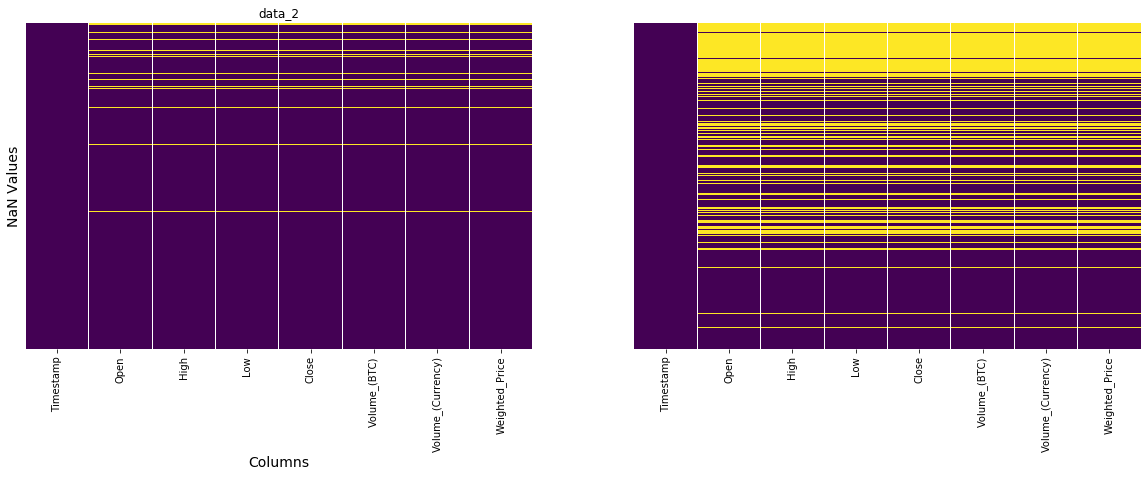

In [21]:
import seaborn as sns
plt.figure(figsize=(20,6))
plt.subplots_adjust(hspace= .2)
plt.subplot(1,2,1)
bar=sns.heatmap(a1.isnull(),cmap='viridis',yticklabels=False,cbar=False)
bar.set_title('data_1')
bar.set_xlabel('Columns',fontsize=14)
bar.set_ylabel('NaN Values',fontsize=14)
plt.subplot(1,2,2)
sns.heatmap(a2.isnull(),cmap='viridis',yticklabels=False,cbar=False)
bar.set_title('data_2')
bar.set_xlabel('Columns',fontsize=14)
bar.set_ylabel('NaN Values',fontsize=14)
plt.show()

## Converting the datatype to datetime

In [22]:
a1["Timestamp"]=pd.to_datetime(a1["Timestamp"],unit="s")

In [23]:
a2["Timestamp"]=pd.to_datetime(a2["Timestamp"],unit="s")

## Filling missing values

In [24]:
#check the missing values
a1.isna().sum()

Timestamp                 0
Open                 109069
High                 109069
Low                  109069
Close                109069
Volume_(BTC)         109069
Volume_(Currency)    109069
Weighted_Price       109069
dtype: int64

In [25]:
a1["Open"].fillna(a1["Open"].mean(),inplace=True)
a1["High"].fillna(a1["High"].mean(),inplace=True)
a1["Low"].fillna(a1["Low"].mean(),inplace=True)
a1["Close"].fillna(a1["Close"].mean(),inplace=True)
a1["Volume_(BTC)"].fillna(a1["Volume_(BTC)"].mean(),inplace=True)
a1["Volume_(Currency)"].fillna(a1["Volume_(Currency)"].mean(),inplace=True)
a1["Weighted_Price"].fillna(a1["Weighted_Price"].mean(),inplace=True)

In [26]:
a1.isna().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [27]:
#data2 missing values
a2.isna().sum()

Timestamp                  0
Open                 1231878
High                 1231878
Low                  1231878
Close                1231878
Volume_(BTC)         1231878
Volume_(Currency)    1231878
Weighted_Price       1231878
dtype: int64

In [28]:
a2["Open"].fillna(a2["Open"].mean(),inplace=True)
a2["High"].fillna(a2["High"].mean(),inplace=True)
a2["Low"].fillna(a2["Low"].mean(),inplace=True)
a2["Close"].fillna(a2["Close"].mean(),inplace=True)
a2["Volume_(BTC)"].fillna(a2["Volume_(BTC)"].mean(),inplace=True)
a2["Volume_(Currency)"].fillna(a2["Volume_(Currency)"].mean(),inplace=True)
a2["Weighted_Price"].fillna(a2["Weighted_Price"].mean(),inplace=True)

In [29]:
a2.isna().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

## Exploratory Data Analysis(EDA)

In [30]:
df1=a1
df2=a2
df1.index=df1.Timestamp
df2.index=df2.Timestamp
df1=df1.resample('M').mean()
df2=df2.resample('M').mean()

/home/student/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


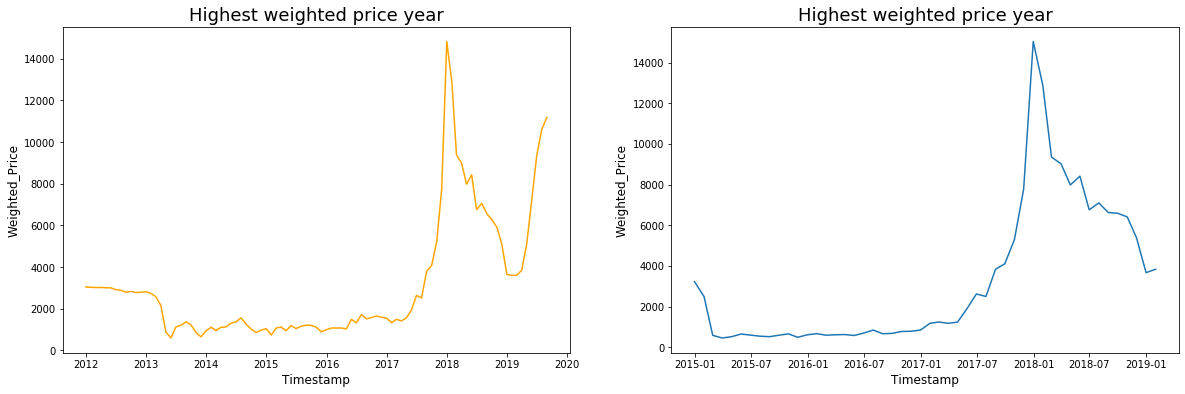

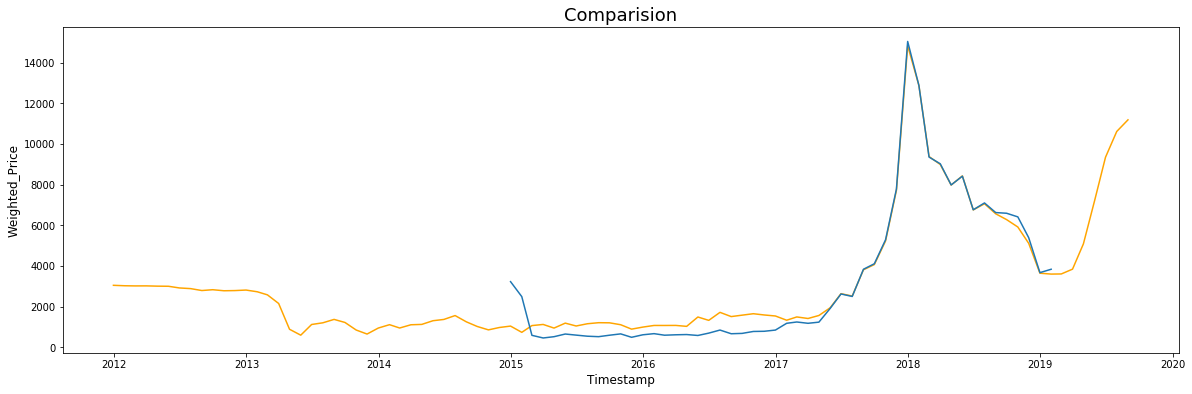

In [31]:
#data 1
plt.figure(figsize=(20,6))
plt.subplots_adjust(hspace= .2)
plt.subplot(1,2,1)
plt.title("Highest weighted price year",fontsize=18)
plt.xlabel('Timestamp',fontsize=12)
plt.ylabel('Weightedprice',fontsize=12)
sns.lineplot(x=df2.index,y=df2.Weighted_Price,color='orange')
#data2
plt.subplot(1,2,2)
plt.title("Highest weighted price year",fontsize=18)
plt.xlabel('Timestamp',fontsize=12)
plt.ylabel('Weightedprice',fontsize=12)
sns.lineplot(x=df1.index,y=df1.Weighted_Price)

#comparision
plt.figure(figsize=(20,6))
plt.title('Comparision',fontsize=18)
plt.xlabel('Timestamp',fontsize=12)
plt.ylabel('Weighted_price',fontsize=12)
sns.lineplot(x=df2.index,y=df2.Weighted_Price,color="orange")
sns.lineplot(x=df1.index,y=df1.Weighted_Price)
plt.show()

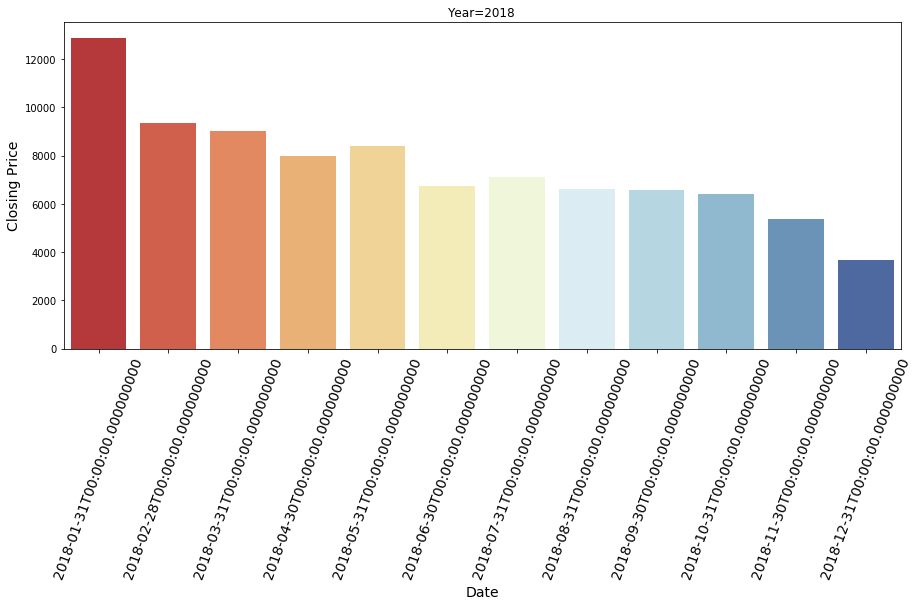

In [32]:
plt.figure(figsize=(15,6))
df_2018=df1['2018']
bar=sns.barplot(x=df_2018.index,y=df_2018.Close,palette='RdYlBu')
bar.set_xticklabels(bar.get_xticklabels(),rotation=70,fontsize=14)
bar.set_title("Year=2018")
bar.set_xlabel('Date',fontsize=14)
bar.set_ylabel('Closing Price',fontsize=14)
plt.show()

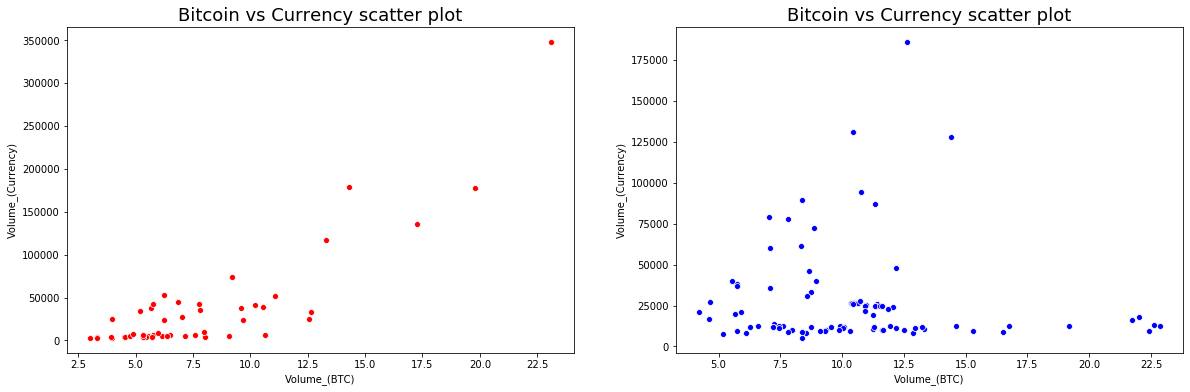

In [33]:
#data1
plt.figure(figsize=(20,6))
plt.subplots_adjust(hspace= .2)
plt.subplot(1,2,1)
plt.title('Bitcoin vs Currency scatter plot',fontsize=18)
sns.scatterplot(x="Volume_(BTC)",y="Volume_(Currency)",data=df1,color='red')
#data2
plt.subplot(1,2,2)
plt.title('Bitcoin vs Currency scatter plot',fontsize=18)
sns.scatterplot(x="Volume_(BTC)",y="Volume_(Currency)",data=df2,color='blue')

[Text(0, 0, '2013-04-30T00:00:00.000000000'),
 Text(0, 0, '2013-05-31T00:00:00.000000000'),
 Text(0, 0, '2013-10-31T00:00:00.000000000'),
 Text(0, 0, '2013-11-30T00:00:00.000000000'),
 Text(0, 0, '2013-12-31T00:00:00.000000000'),
 Text(0, 0, '2014-02-28T00:00:00.000000000'),
 Text(0, 0, '2014-10-31T00:00:00.000000000'),
 Text(0, 0, '2015-01-31T00:00:00.000000000'),
 Text(0, 0, '2015-04-30T00:00:00.000000000'),
 Text(0, 0, '2015-11-30T00:00:00.000000000')]

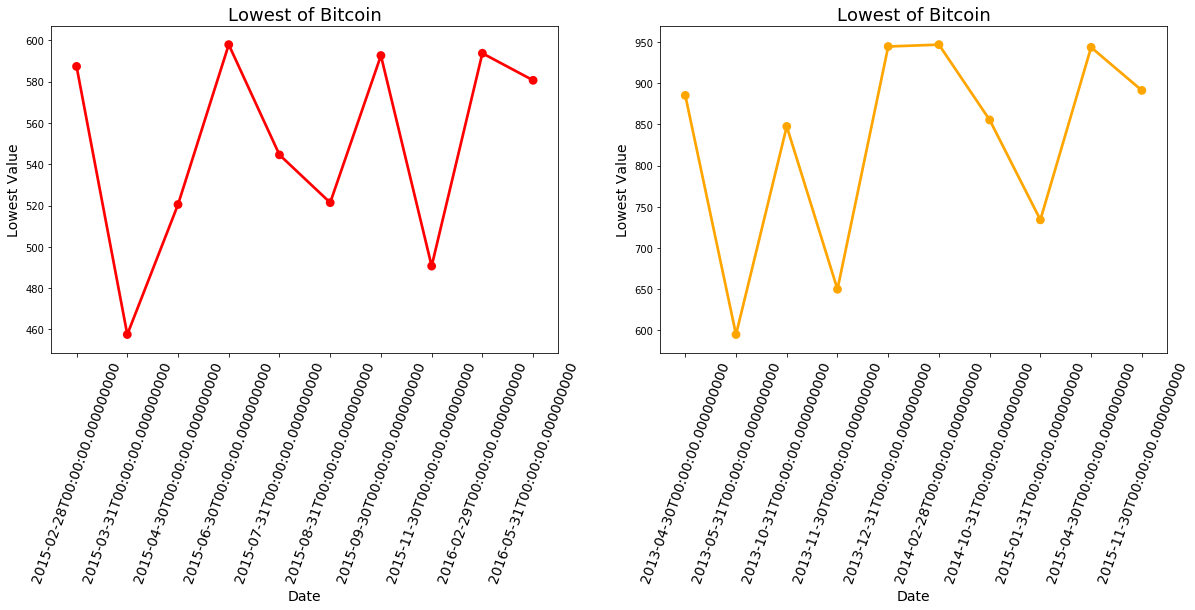

In [34]:
low_df=df1.sort_values(by=['Low'],ascending=True).head(10)
low_df_2=df2.sort_values(by=['Low'],ascending=True).head(10)
#data1
plt.figure(figsize=(20,6))
plt.subplots_adjust(hspace= .2)
plt.subplot(1,2,1)
plt.title('Lowest of Bitcoin',fontsize=18)
bar=sns.pointplot(x=low_df.index,y=low_df.Low,color='red')
bar.set_xlabel("Date",fontsize=14)
bar.set_ylabel("Lowest Value",fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=70,fontsize=14)
#data2
plt.subplot(1,2,2)
plt.title('Lowest of Bitcoin',fontsize=18)
bar=sns.pointplot(x=low_df_2.index,y=low_df_2.Low,color='orange')
bar.set_xlabel("Date",fontsize=14)
bar.set_ylabel("Lowest Value",fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=70,fontsize=14)

## Modelling

### Data Preprocessing

In [35]:
df=a1
df['Timestamp']=df['Timestamp'].map(dt.datetime.toordinal)

In [36]:
x=df["Timestamp"].values
y=df["Close"].values
x=x.reshape(-1,1)

In [37]:
#splitting the data
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

## Standardization of data

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

## Linear Regression

In [39]:
linear_regressor=LinearRegression()
linear_regressor.fit(xtrain,ytrain)
ypred=linear_regressor.predict(xtest)
lin_ac=linear_regressor.score(xtest,ytest)

In [40]:
print(lin_ac)

0.5028380517399124


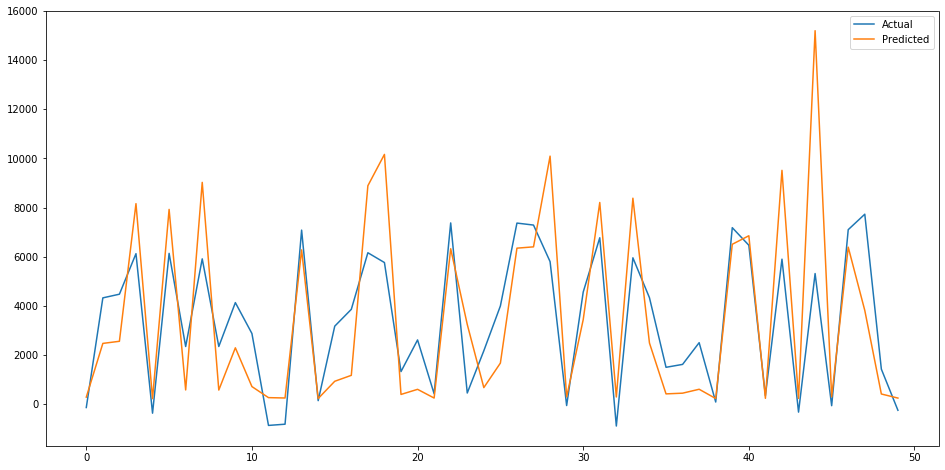

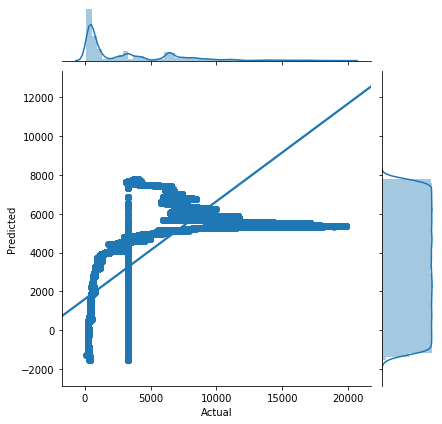

In [41]:
test = pd.DataFrame({'Predicted':ypred,'Actual':ytest})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")

#### In this case my prediction is 50%

## Decision Tree Regressor

In [42]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(xtrain,ytrain)
tree_reg.score(xtest,ytest)

0.9762835891826671

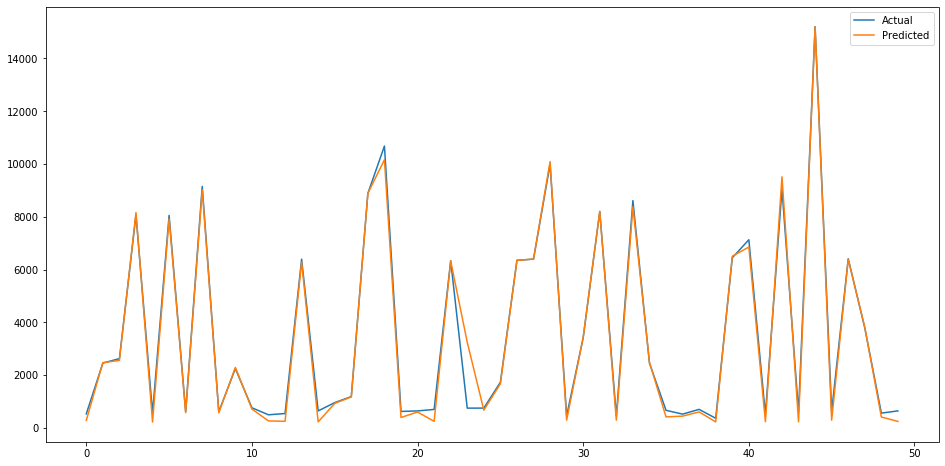

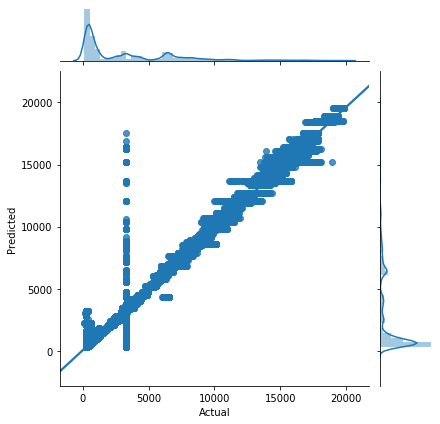

In [44]:
dt_y_pred=tree_reg.predict(xtest)
test = pd.DataFrame({'Predicted':dt_y_pred,'Actual':ytest})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")

#### My prediction in this case is 97%

## Conclusion

The goal of this project was to generate a model with 90% accuracy to predict the price of bitcoin. And here we did several basic steps and then did data modelling, this includes standardization of data where we did linear regression and decision tree regression and predicted our accuracy. We got 50% accuracy as output of linear regression whereas 97% accuracy as output of decision tree regression which is our goal to get accomplished. Hence "Decision Tree Regression stands at top level in this case with 97% accuracy"